INTRODUCTION 

Divorce Predictors Scale (DPS) was used to carry out divorce predictions on the basis of Gottman couples therapy. Of the participants, 84 (49%) were divorced and 86 (51%) were married couples and were made to complete a “Personal Information Form” and “Divorce Predictors Scale”, answering a series of questions relating to their perception of their relationship on a scale of 0-4, pertaining to how much one agrees with the statement given.
Our study aims to find the accuracy of the significant questions in the Divorce Predictors Scale that affect divorce. In our study, we will be using 6 most signifiance questions obtained from the "DIVORCE PREDICTION USING CORRELATION BASED FEATURE SELECTION AND ARTIFICIAL NEURAL NETWORKS" study, and apply a direct classification model to answer our research question. Our research question is as follows:
"Based on one's answers to the 6 questions, what is their likelyhood that their marriage will end in divorce?" 

Dataset provided by our source is of a zip format. Since they are difficult to load into R, we first converted the original zip file into a csv fil, and have link the zip file and the reformatted csv file in our methods section. 
 The six most significant attirbutes with their signifiance found in the above study are shown below.


In [1]:
library(repr)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6) #limits output of dataframes to 6 row

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
#Reading in the questions
div_questions <- read_delim("https://raw.githubusercontent.com/shjuliay/group107/main/DivorceQuestions.txt", delim = ":", col_names = FALSE) %>%
mutate(QuestionNumber = X1, Question = X2) %>%
select(QuestionNumber, Question)
#div_questions

div_6questions <- div_questions %>%
filter(QuestionNumber == 2 | QuestionNumber == 6 | QuestionNumber == 11 | QuestionNumber == 18 | QuestionNumber == 26 | QuestionNumber == 40)
div_6questions

Rows: 55 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ":"
chr (1): X2
dbl (1): X1

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


QuestionNumber,Question
<dbl>,<chr>
2,"I know we can ignore our differences, even if things get hard sometimes."
6,We don't have time at home as partners.
11,"I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other."
18,My spouse and I have similar ideas about how marriage should be
26,I know my spouse's basic anxieties.
40,We're just starting a discussion before I know what's going on.


PREMILINARY EXPLORATORY DATA ANALYSIS

In [3]:
#Reading in the data from github
#link directly to zipped dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/00497/
#link to Center for Machine Learning and Intelligent Systems: https://archive.ics.uci.edu/ml/datasets/Divorce+Predictors+data+set
#link to origional study: https://dergipark.org.tr/en/pub/nevsosbilen/issue/46568/549416
div_data <- read_csv2("https://raw.githubusercontent.com/shjuliay/group107/main/divorce%20(1).csv") %>%
mutate(Divorced = as.factor(Class)) %>%
select(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40, Divorced)

"Divorce data:"
div_data

#Creating a table of the number of divorced and not divorced
div_sum <- div_data %>%
group_by(Divorced) %>%
    summarize(n = n())
#div_sum


#Creating a table for the mean answer for each question
atr_sum <- div_data %>%
select(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40) %>%
map_df(mean) 

"Mean answers for both divorced and not divorced:"
atr_sum


#Creating a table for the mean answer for each question: divorced
sum_div <- div_data %>%
select(-Divorced) %>%
    map_df(mean)
#sum_div

sum_div_longer <- sum_div %>%
pivot_longer(cols = (c(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40)),
             names_to = "Atribute")

"Mean answers for divorced:"
sum_div_longer


#Creating a table for the mean answer for each question: not divorced
sum_notdiv <- div_data %>%
filter(Divorced == 0) %>%
select(-Divorced) %>%
    map_df(mean) 
#sum_notdiv

sum_notdiv_longer <- sum_notdiv %>%
pivot_longer(cols = (c(Atr2, Atr6, Atr11, Atr18, Atr26, Atr40)),
             names_to = "Atribute")

"Mean answers for not divorced:"
sum_notdiv_longer

"No rows have missing data."

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 170 Columns: 55
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (55): Atr1, Atr2, Atr3, Atr4, Atr5, Atr6, Atr7, Atr8, Atr9, Atr10, Atr11...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Divorce data:"

Atr2,Atr6,Atr11,Atr18,Atr26,Atr40,Divorced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,0,1,0,0,3,1
4,0,4,4,1,4,1
2,3,3,3,2,3,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮
1,0,0,0,1,2,0
0,0,0,0,0,1,0
0,0,0,0,0,0,0


[1] "Mean answers for both divorced and not divorced:"

Atr2,Atr6,Atr11,Atr18,Atr26,Atr40
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.652941,0.7470588,1.688235,1.517647,1.488235,1.870588


[1] "Mean answers for divorced:"

Atribute,value
<chr>,<dbl>
Atr2,1.6529412
Atr6,0.7470588
Atr11,1.6882353
Atr18,1.5176471
Atr26,1.4882353
Atr40,1.8705882


[1] "Mean answers for not divorced:"

Atribute,value
<chr>,<dbl>
Atr2,0.46511628
Atr6,0.37209302
Atr11,0.19767442
Atr18,0.09302326
Atr26,0.19767442
Atr40,0.20930233


[1] "No rows have missing data."

value
<dbl>
1.494118


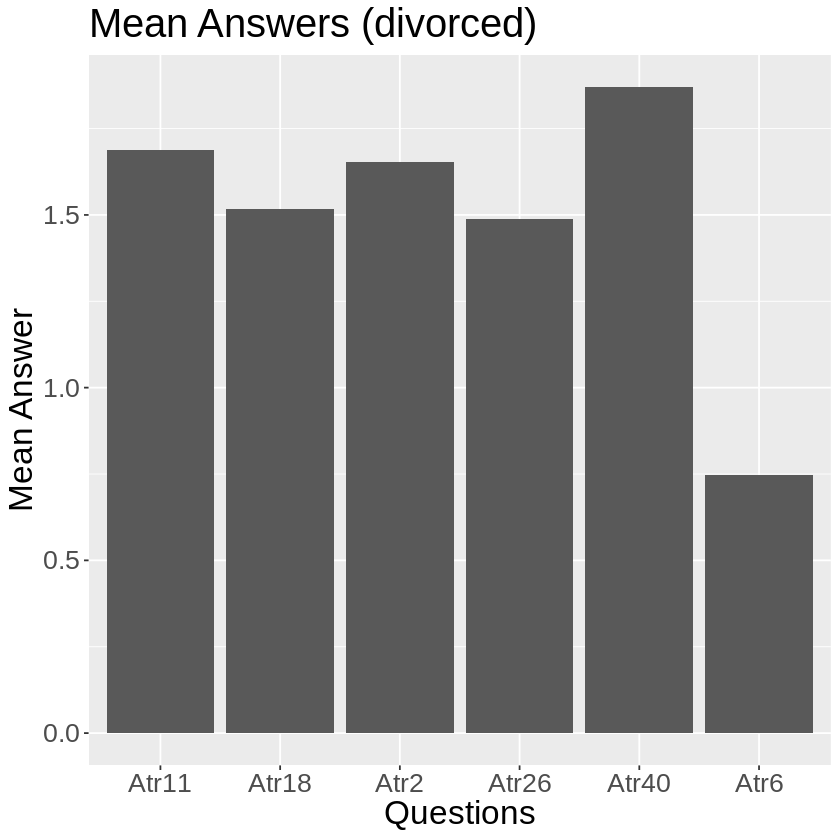

In [4]:
#creating visualizations of 6 predictor questions (divorced)
sum_div_bar <- sum_div_longer %>%
ggplot(aes(x = Atribute, y = value)) +
geom_bar(stat = "identity") +
labs(x = "Questions", y = "Mean Answer") +
theme(text = element_text(size = 20)) +
ggtitle("Mean Answers (divorced)")
sum_div_bar

#sum of all attributes
sum_div_longer |>
select(value) |>
map_df(mean)

Divorced graph demonstrates high values for Atr11, 18, 2, 26, and 40. Overall attribute mean is around 1.49. 

value
<dbl>
0.255814


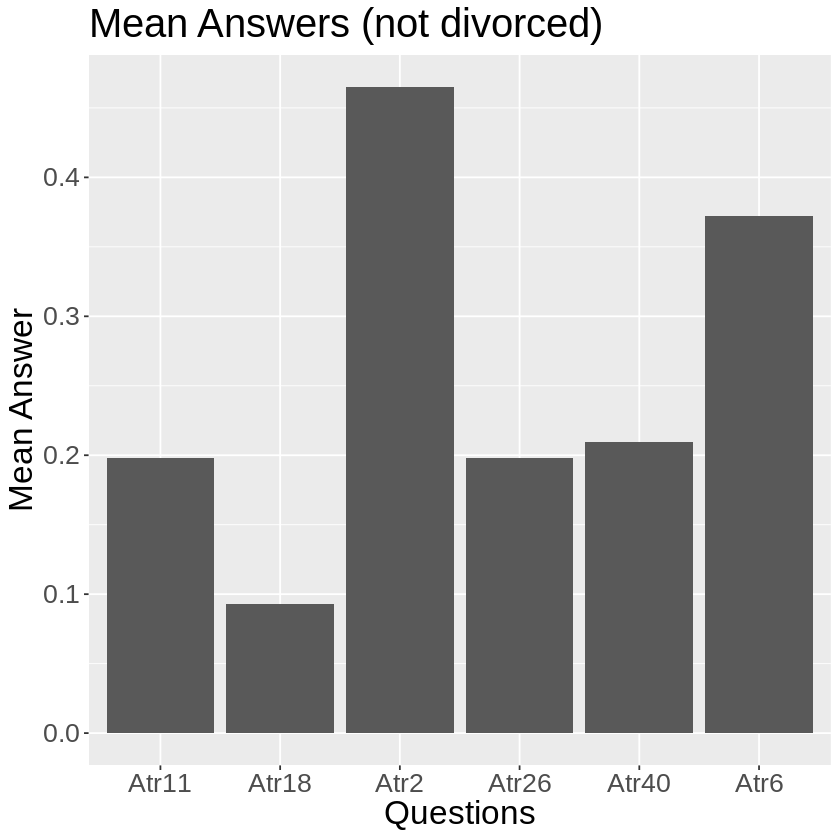

In [5]:
#creating visualizations of 6 predictor questions (married)
sum_notdiv_bar <- sum_notdiv_longer %>%
ggplot(aes(x = Atribute, y = value)) +
geom_bar(stat = "identity") +
labs(x = "Questions", y = "Mean Answer") +
theme(text = element_text(size = 20)) +
ggtitle("Mean Answers (not divorced)")
sum_notdiv_bar

sum_notdiv_longer |>
select(value) |>
map_df(mean)

Married graph demonstrates low means for Atr11, 18, 26, and 40. Sum of all attributes is lower, at around 0.26.

In [6]:
#Creating a classification prediction model
div_data_split <- div_data %>%
    initial_split(prop = 0.75, strata = Divorced)

#Splitting the data into training and testing
div_testing <- testing(div_data_split)
#div_testing
div_training <- training(div_data_split)
#div_training

#Splitting the training into subtraining and subtesting
div_training_split <- initial_split(div_training, prop = 0.75, strata = Divorced)
div_subtraining <- training(div_training_split)
div_subtraining
div_subtesting <- testing(div_training_split)
div_subtesting

Atr2,Atr6,Atr11,Atr18,Atr26,Atr40,Divorced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0,0,0,0,0,0
0,0,0,0,0,0,0
0,0,0,0,1,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
2,3,1,3,3,4,1
0,2,2,3,0,3,1
4,0,4,4,2,3,1


Atr2,Atr6,Atr11,Atr18,Atr26,Atr40,Divorced
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0,0,0,0,0,0,0
1,0,0,0,1,0,0
1,0,0,0,0,0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮
3,1,3,3,3,4,1
2,2,3,2,2,4,1
4,0,3,4,4,4,1


In [7]:
#Creating standardization recipe
div_recipe <- recipe(Divorced ~., data = div_subtraining) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

#Creating the knn model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

#Fit the knn model
div_fit <- workflow() %>%
  add_recipe(div_recipe) %>%
  add_model(knn_spec) %>%
  fit(data = div_subtraining)

#Creating vfold

div_vfold <- vfold_cv(div_subtraining, v = 10, strata = Divorced)
#div_vfold

k_vals <- tibble(neighbors = seq(from = 1, to = 60, by = 2))

#Creating workflow 
knn_results <- workflow() %>%
  add_recipe(div_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = div_vfold, grid = k_vals) %>%
  collect_metrics() 

accuracies <- knn_results %>%
  filter(.metric == "accuracy")
accuracies

Warning message:
“tune samples were requested but there were 95 rows in the data. 90 will be used.”


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.9663889,10,0.01721550,Preprocessor1_Model01
3,accuracy,binary,0.9788889,10,0.01409842,Preprocessor1_Model02
5,accuracy,binary,0.9788889,10,0.01409842,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,accuracy,binary,0.9788889,10,0.01409842,Preprocessor1_Model28
57,accuracy,binary,0.9788889,10,0.01409842,Preprocessor1_Model29
59,accuracy,binary,0.9788889,10,0.01409842,Preprocessor1_Model30


Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message:
“Removed 10 row(s) containing missing values (geom_path).”


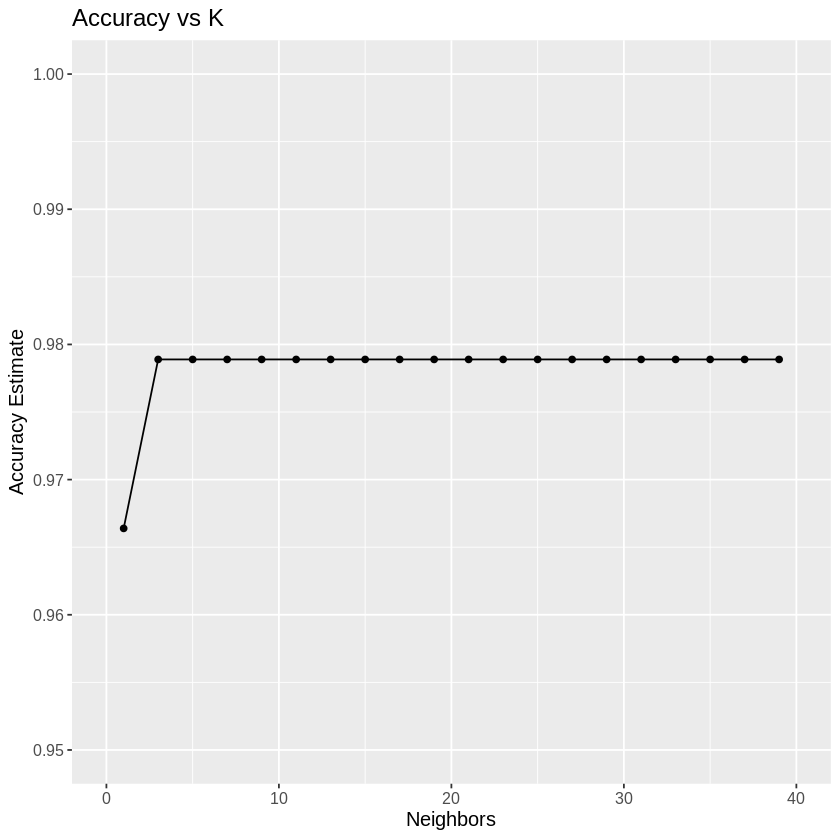

In [29]:
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12)) +
  xlim(0, 40) +
  ylim(.95, 1) +
  ggtitle("Accuracy vs K")

accuracy_vs_k

In [30]:
div_predictions <- predict(div_fit, div_testing) %>%
bind_cols(div_testing)
div_predictions

div_conf_mat <- div_predictions %>%
    conf_mat(truth = Divorced, estimate = .pred_class)
div_conf_mat
print("This means the predictions are accurate: only one(no?)!!! person is incorrectly classified")

.pred_class,Atr2,Atr6,Atr11,Atr18,Atr26,Atr40,Divorced
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1,1,4,3,3,4,1
1,2,4,3,3,3,2,1
1,4,0,4,4,4,4,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
0,1,0,1,0,1,1,0
0,1,1,1,1,0,0,0
0,1,0,0,0,1,2,0


          Truth
Prediction  0  1
         0 22  0
         1  0 21

[1] "This means the predictions are accurate: only one person is incorrectly classified"


[1] "To see why this is the case, and to confirm our method is correct, we can check how the to be divorced and non-divorced people answered these questions:"


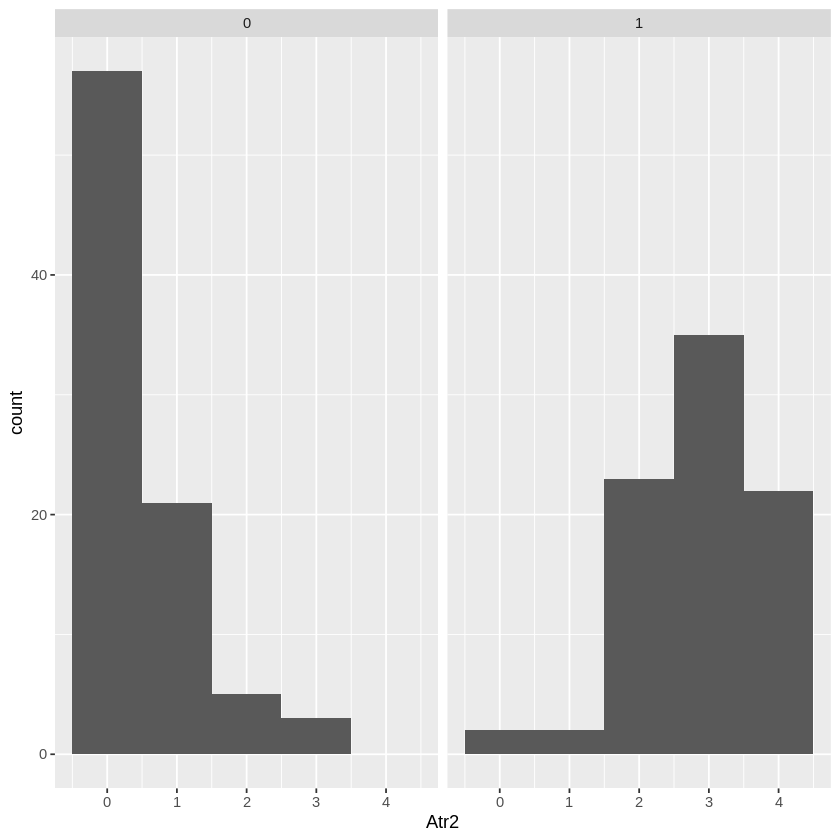

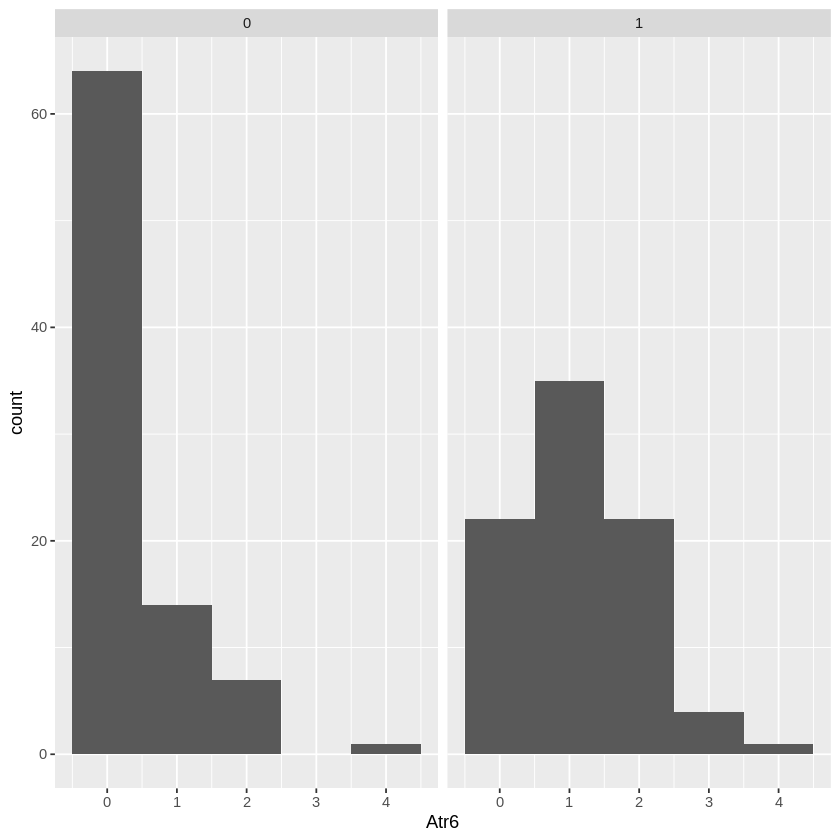

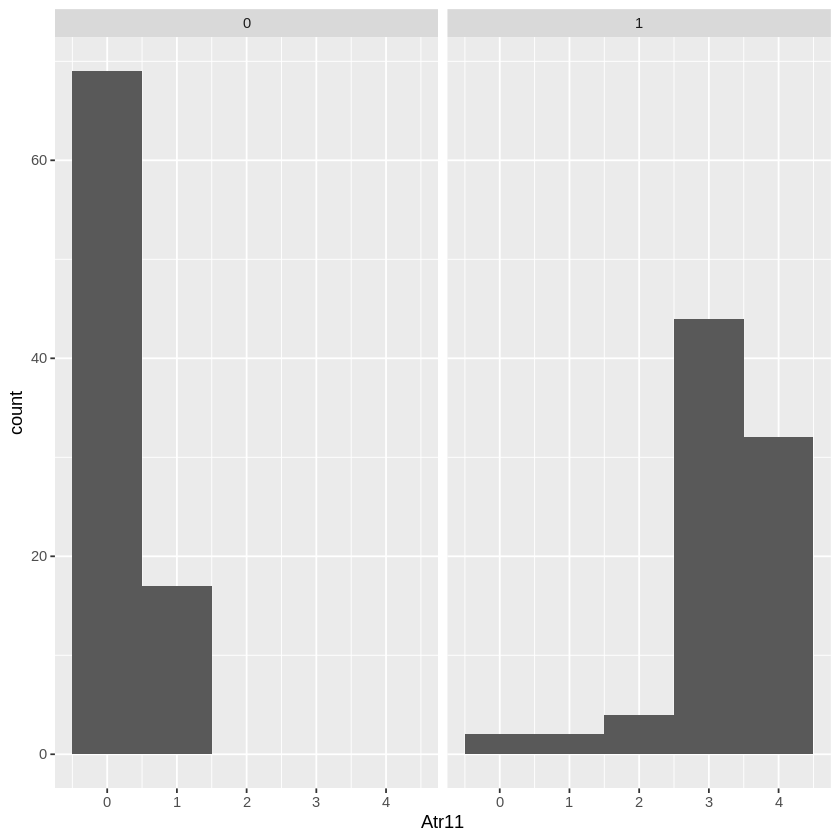

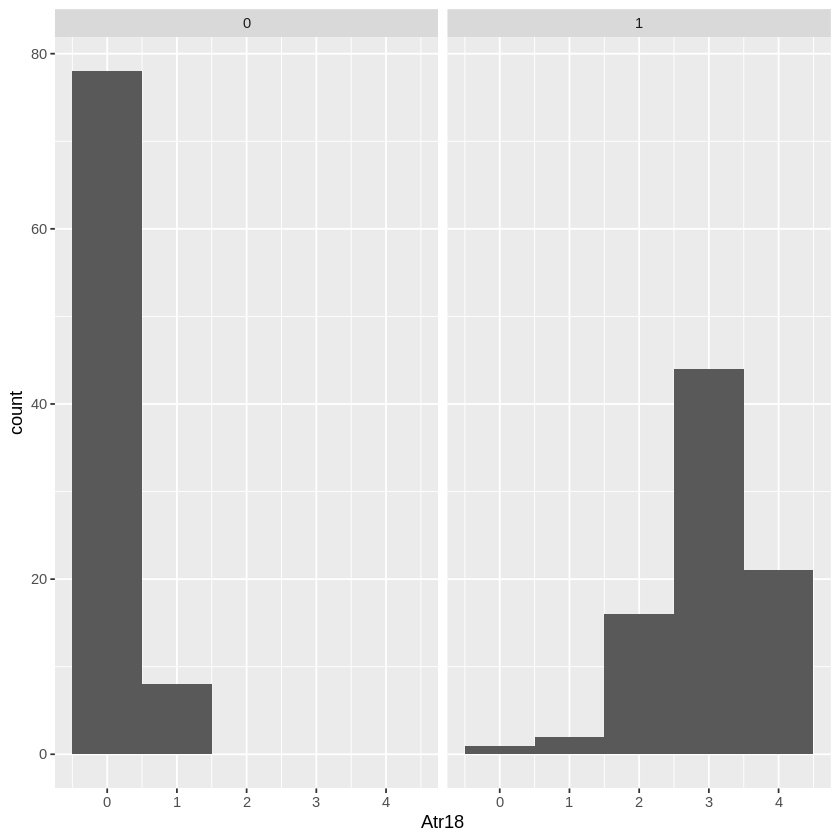

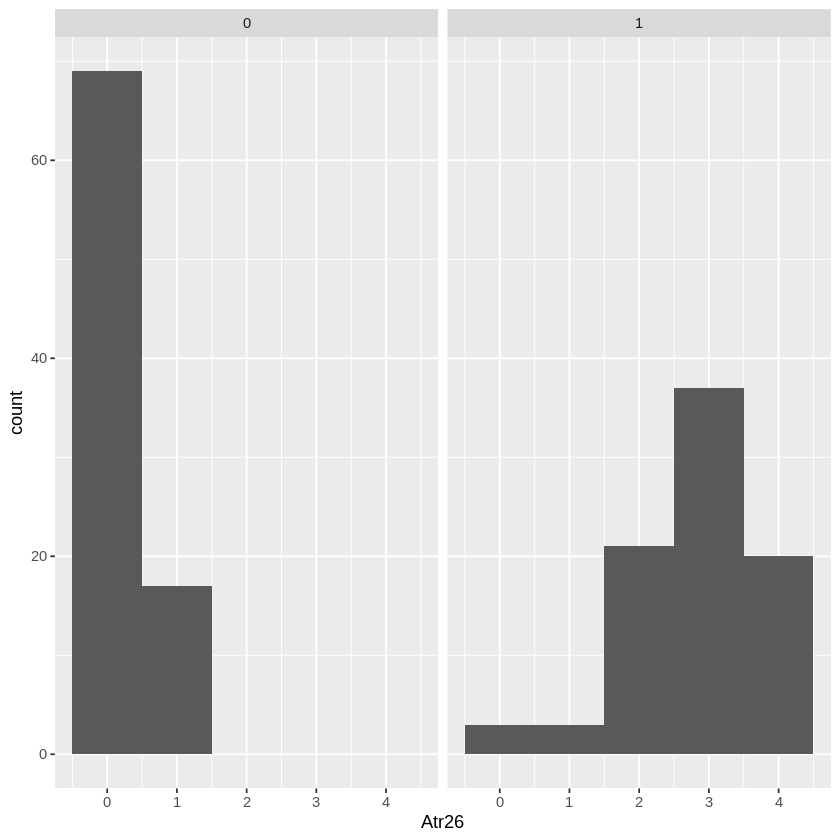

[1] "Evidently, there is a major difference in how the two groups answered and so it is very easy for our model to accuratly predict their class"


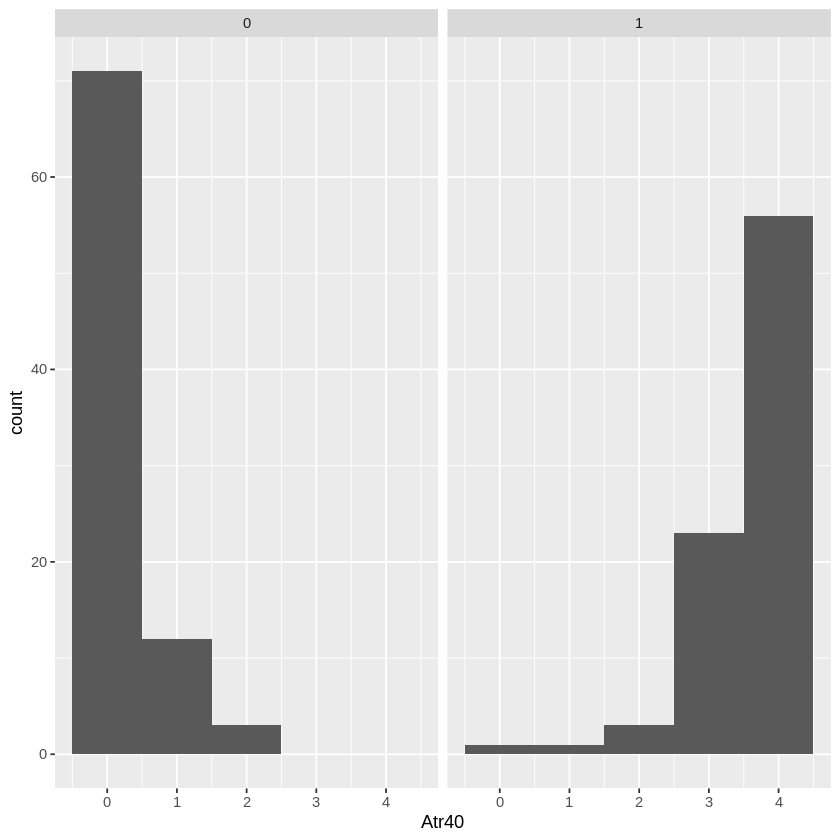

In [31]:
#div_2 <- div_data %>%
#    filter(Divorced == 1) %>%
#    select(Atr2)
#div_2_dist <- div_2 %>%
#    ggplot(aes(x = Atr2)) +
#    geom_histogram(binwidth = 1) +
#    ggtitle("Q2 Answer Distribution: Divorced")
#div_2_dist

#notdiv_2 <- div_data %>%
#    filter(Divorced == 0) %>%
#    select(Atr2)
#notdiv_2_dist <- notdiv_2 %>%
#    ggplot(aes(x = Atr2)) +
#    geom_histogram(binwidth = 1) +
#    ggtitle("Q2 Answer Distribution: Not Divorced")
#notdiv_2_dist

#Visualizing how the two groups answered
print("To see why this is the case, and to confirm our method is correct, we can check how the to be divorced and non-divorced people answered these questions:")

div_2_plot <- div_data %>%
    select(Atr2, Divorced) %>%
    ggplot(aes(x = Atr2)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_2_plot

div_6_plot <- div_data %>%
    select(Atr6, Divorced) %>%
    ggplot(aes(x = Atr6)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_6_plot

div_11_plot <- div_data %>%
    select(Atr11, Divorced) %>%
    ggplot(aes(x = Atr11)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_11_plot

div_18_plot <- div_data %>%
    select(Atr18, Divorced) %>%
    ggplot(aes(x = Atr18)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_18_plot

div_26_plot <- div_data %>%
    select(Atr26, Divorced) %>%
    ggplot(aes(x = Atr26)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_26_plot

div_40_plot <- div_data %>%
    select(Atr40, Divorced) %>%
    ggplot(aes(x = Atr40)) +
    geom_histogram(binwidth = 1) +
facet_grid(cols = vars(Divorced))
div_40_plot

print("Evidently, there is a major difference in how the two groups answered and so it is very easy for our model to accuratly predict their class")

In [ ]:
#-----------------------------------------------------------
#Finding prediction accuracy

In [ ]:
#-----------------------------------------------------------
#Bootstraping to find level of confidence

METHODS

1. Load, clean, and wrangle data into a tidy format. Use questions 2, 6, 11, 18, 26, and 40 (based on their significance).
2. Graph data to make inferences.
3. Split data into training(¾) and testing data(¼) set, with roughly 51% of the data from class 1 (divorced), and 49% from class 0 (married). 
4. Train classifier and use cross-validation to find the best k-value.
5. Use Test data and check accuracy

To visualize our dataset, we will use a comparative bar plot that signifies the comparison between the 6 attributes chosen. There will be two different graphs representing the divorced and the non-divorced couples. We are using a bar plot because it summarizes an enormous amount of data with each data category being represented by its frequency distribution. Moreover, it will allow easy identification of patterns to make inferences. 


EXPECTED OUTCOMES and SIGNIFICANCE

The impact of such findings could point out early signs of marriage tension as well as lack of communication between the partners allowing the couple to seek counseling. The scores will help therapists and counselors understand the relationship in depth, and formulate cases and intervention plans. Our expectations were that the attributes between married and divorced couples would be of similar scale however, the scale difference was notorious. On the other hand, some future questions that would arise are why would the attribute cause such polarizing opinions between divorced and non-divorced couples? Thus we find where is the breaking point that would lead a married couple to give such importance to an attribute that would lead to their divorce.